In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import CubicSpline
from scipy import optimize

**1. Elaborar una gráfica de la densidad como función de la altura.**

In [ ]:
#Constantes
λ=7482.2 #m
p0=1.29 #m/kg^3

Text(0.5, 1.0, 'Densidad exponencial')

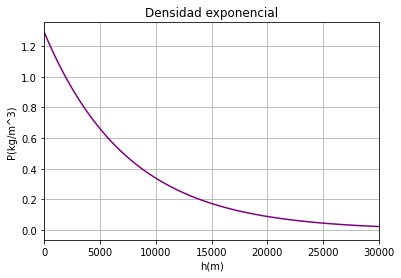

In [ ]:
 #Función de densidad como función de la altura
 y = np.arange(0,50000,100)
def P(y):
  P=p0*(np.e**(-y/λ))
  return P

#Gráfico de la densidad como función de la altura
plt.figure()
plt.plot(y, P(y), color="purple")
plt.xlim(0, 3e4)
plt.grid()
plt.xlabel('h(m)')
plt.ylabel('P(kg/m^3)')
plt.title("Densidad exponencial")

**2.Diseñar un programa que resuelva la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros:**

In [86]:
v_1 = 0 #velocidad inicial

#Lista de condiciones iniciales
x01 = np.array([30000, v_1]) 
x02 = np.array([40000, v_1]) 
x03 = np.array([50000, v_1]) 
x04 = np.array([60000, v_1]) 
x05 = np.array([70000, v_1]) 

m = 60     #kg
g = 9.8    #m/s^2
A = 0.3    #m^2 
λ = 7482.2 #m
ρ0 = 1.29  #kg/m^3
δ = 0.8    #unidades
k0 = ρ0*A*δ/(2*m)

# Función que retorna dy/dt
def mov_paracaidista(x, t, params):
    m =  params[0]
    g =  params[1]
    k0 = params[2]
    λ =  params[3]
    
    dxdt = x[1]
    dvdt =  -g +k0*(x[1]**2)*np.exp(-x[0]/λ) 
    return [dxdt, dvdt]

params = [m, g, k0,λ ]

t = np.linspace(0,280,1000) 

# Resuelve ecuación diferencial
y1 = odeint(func_paracaidista, x01, t, args=(params, ) )  
y2 = odeint(func_paracaidista, x02, t, args=(params, ) )  
y3 = odeint(func_paracaidista, x03, t, args=(params, ) )  
y4 = odeint(func_paracaidista, x04, t, args=(params, ) )  
y5 = odeint(func_paracaidista, x05, t, args=(params, ) )  


In [ ]:
x1 = y1[:,0] #posición en el tiempo, 30km
v1 = y1[:,1] #Velocidad en el tiempo, 30km

x2 = y2[:,0] #Posición en el tiempo, 40 km
v2 = y2[:,1] #Velocidad en el tiempo, 40 km

x3 = y3[:,0] #Posición en el tiempo, 50 km
v3 = y3[:,1] #Velocidad en el tiempo, 50 km

x4 = y4[:,0] #Posición en el tiempo, 60 km
v4 = y4[:,1] #Velocidad en el tiempo, 60 km

x5 = y5[:,0] #Posición en el tiempo, 70 km
v5 = y5[:,1] #Velocidad en el tiempo, 70 km

**3. Con la solución de la ecuación diferencial, elaborar una gráfica de:**

- la posición como función del tiempo.

- La velocidad como función del tiempo.

- La velocidad como función de la posición 

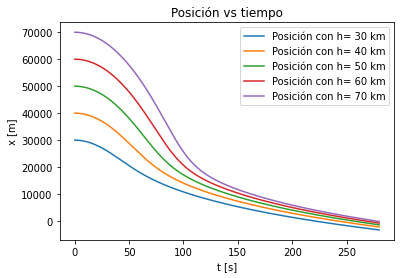

In [ ]:
#Gráfico de posición como función del tiempo
plt.plot(t,x1)
plt.plot(t,x2)
plt.plot(t,x3)
plt.plot(t,x4)
plt.plot(t,x5)
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.title("Posición vs tiempo")
plt.legend(['Posición con h= 30 km','Posición con h= 40 km','Posición con h= 50 km','Posición con h= 60 km','Posición con h= 70 km']) 



Text(0.5, 1.0, 'Velocidad vs tiempo')

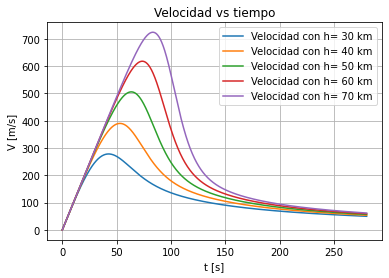

In [ ]:
#Gráfico de velocidad como función del tiempo
plt.plot(t,-v1)

plt.plot(t,-v2)
plt.plot(t,-v3)
plt.plot(t,-v4)
plt.plot(t,-v5)
plt.grid()
plt.legend(['Velocidad con h= 30 km','Velocidad con h= 40 km','Velocidad con h= 50 km','Velocidad con h= 60 km','Velocidad con h= 70 km']) 
plt.xlabel('t [s]')
plt.ylabel('V [m/s]')
plt.title("Velocidad vs tiempo")

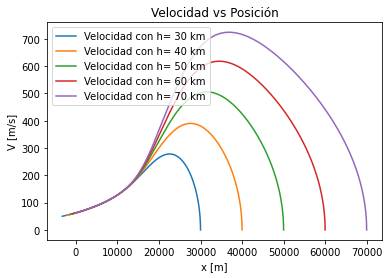

In [ ]:
#Gráfica de velocidad como función de la posición
plt.plot(x1,-v1)
plt.plot(x2,-v2)
plt.plot(x3,-v3)
plt.plot(x4,-v4)
plt.plot(x5,-v5)
plt.xlabel('x [m]')
plt.ylabel('V [m/s]')
plt.title("Velocidad vs Posición")
plt.legend(['Velocidad con h= 30 km','Velocidad con h= 40 km','Velocidad con h= 50 km','Velocidad con h= 60 km','Velocidad con h= 70 km']) 

**4.Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:**

In [82]:
#Hallando la velocidad máxima numéricamente

max1=np.max(-v1) #Con h=30km
max2=np.max(-v2) #Con h=40km
max3=np.max(-v3) #Con h=50km
max4=np.max(-v4) #Con h=60km
max5=np.max(-v5) #Con h=70km

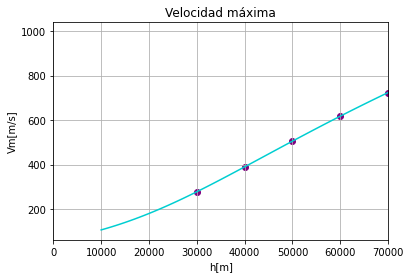

In [90]:
#Definición de parámetros
zi=[30000,40000,50000,60000,70000]  #Valores de los puntos anteriores
vi=[max1,max2,max3,max4,max5]
z = np.arange(10000,100000,1000)
max = []
#Para hallar velocidad máxima de caída en función de la altura de caída
for i in range(len(z)):
  x=np.array([z[i],v_1])
  y=odeint(mov_paracaidista, x, t, args=(params, ) )
  max.append(np.max(-y[:,1]))

#Gráfico de velocidad máxima
plt.title("Velocidad máxima")
plt.plot(z,max, color= "darkturquoise")
plt.xlabel("h[m]")
plt.ylabel("Vm[m/s]")
plt.xlim(0, 7e4)
plt.scatter(zi,vi, color= "purple")
plt.grid()